## **Business case**

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D). Then, they performed segmented outreach and communication for different segments of customers. This strategy has worked exceptionally well for them. They plan to use the same strategy on new markets.

You are required to help the manager to predict the right group of new customers. The demand is to create a machine learning model that can allocate each customer to the adequate segment


Dataset Source: https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation

# **The project**

### Setting up envoirment

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Importing dataset

In [51]:
df_raw =  pd.read_csv('https://raw.githubusercontent.com/Shake782/HAN-individual-project/main/train.csv')

### Data understanding

#### Data shape

In [52]:
df_raw.shape

(8068, 11)

#### Data types

In [4]:
df_raw.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


#### Numerical variables understanding

In [6]:
num_var = ['Age','Work_Experience','Family_Size']

In [7]:
df_raw[num_var].describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


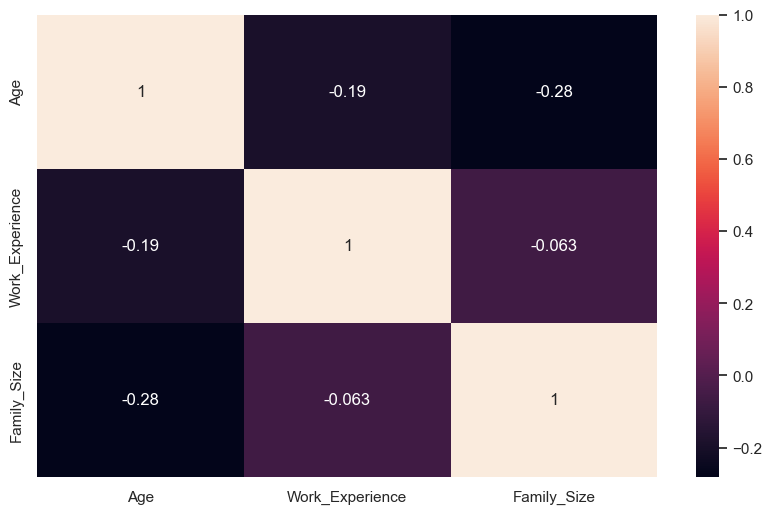

In [53]:
#Checking for multicollinearity
corrmat = df_raw[num_var].corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corrmat, yticklabels=True, square= False, annot=True)
plt.show()

#### Missing data

In [9]:
#Counting missing values on each column
df_raw.isna().sum(axis = 0).sort_values(ascending = False)

Work_Experience    829
Family_Size        335
Ever_Married       140
Profession         124
Graduated           78
Var_1               76
ID                   0
Gender               0
Age                  0
Spending_Score       0
Segmentation         0
dtype: int64

There are missing values in columns 'Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Family_Size' and 'Var_1'.

The package 'missingno' creates a visual to show the behaviour of missing values. The the black columns represent columns of the dataset and the white rows are the missing values in this columns.  

<AxesSubplot: >

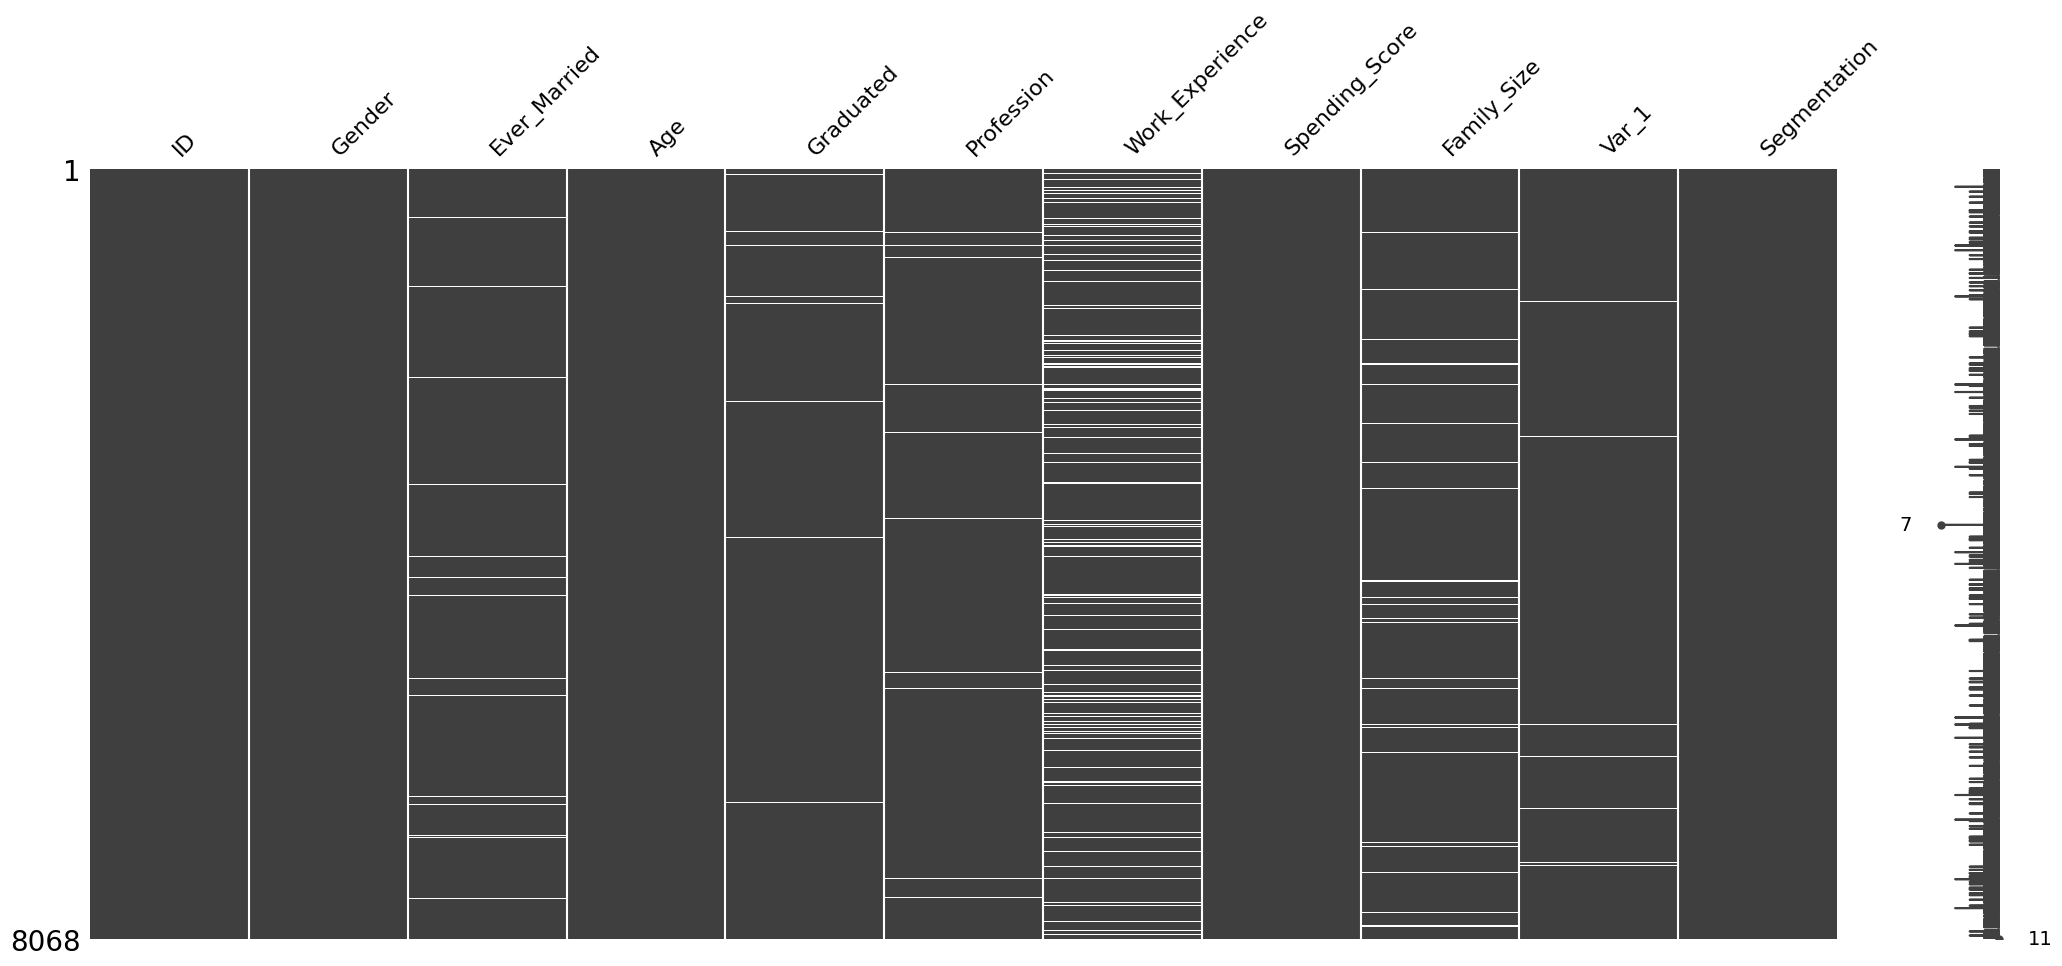

In [11]:
msno.matrix(df_raw)

Analysing the visuals, it shows that the missing data don't follow a regular pattern and is randomly missing.

#### Visualizing segmentations and characteristics

##### Visualization - Understanding segments distribution in the dataset

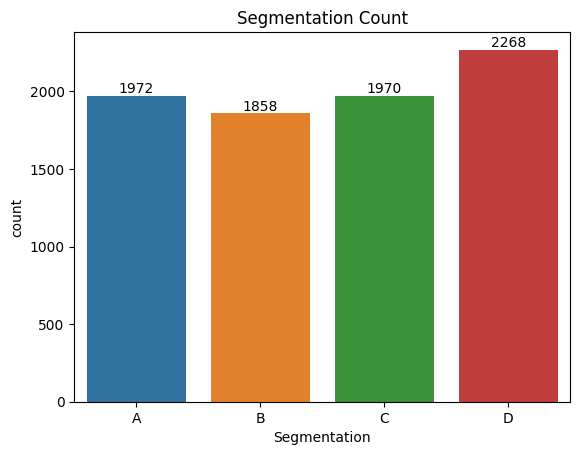

In [12]:
#Segmentation distribution in the complete dataset

plt.title('Segmentation Count')
ax = sns.countplot(x=df_raw.Segmentation, order = ['A','B','C','D'])
ax.bar_label(container=ax.containers[0])
plt.show()

##### Preparing data for visualization

In [13]:
#Filling missing values
visuals = df_raw[:]

visuals['Work_Experience'] = visuals['Work_Experience'].fillna('No info')
visuals['Family_Size'] = visuals['Family_Size'].fillna('No info')
visuals['Ever_Married'] = visuals['Ever_Married'].fillna('No info')
visuals['Profession'] = visuals['Profession'].fillna('No info')
visuals['Graduated'] = visuals['Graduated'].fillna('No info')
visuals['Var_1'] = visuals['Var_1'].fillna('No info')

In [14]:
#Filtering dataset by segment
segments = visuals[
    ['Segmentation'
    ,'Gender'
    ,'Ever_Married'
    ,'Age'
    ,'Graduated'
    ,'Profession'
    ,'Work_Experience'
    ,'Spending_Score'
    ,'Family_Size'
    ,'Var_1'
    ]
].set_index('Segmentation')


seg_a = segments.loc['A']
seg_b = segments.loc['B']
seg_c = segments.loc['C']
seg_d = segments.loc['D']

##### Visualization - Categorical variables

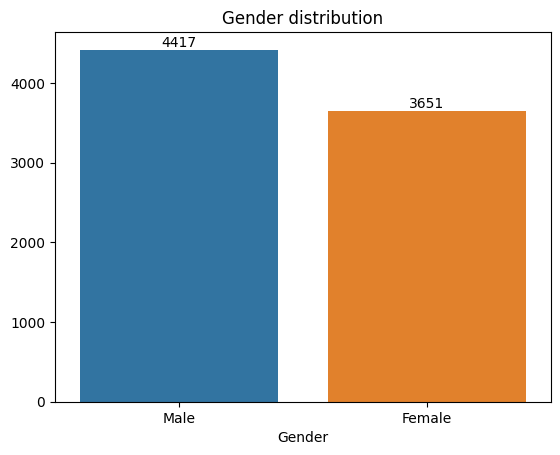

In [15]:
#Gender distribution in the complete dataset

var_plot = visuals['Gender']
ax = sns.countplot(x=var_plot,
                   order=var_plot.value_counts(ascending=False).index);
ax.set_ylabel(None)
#plt.text(x=0, y=0, s="Gender distribution", va='top', fontsize=16, weight='bold')
ax.set_title('Gender distribution')
abs_values = var_plot.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

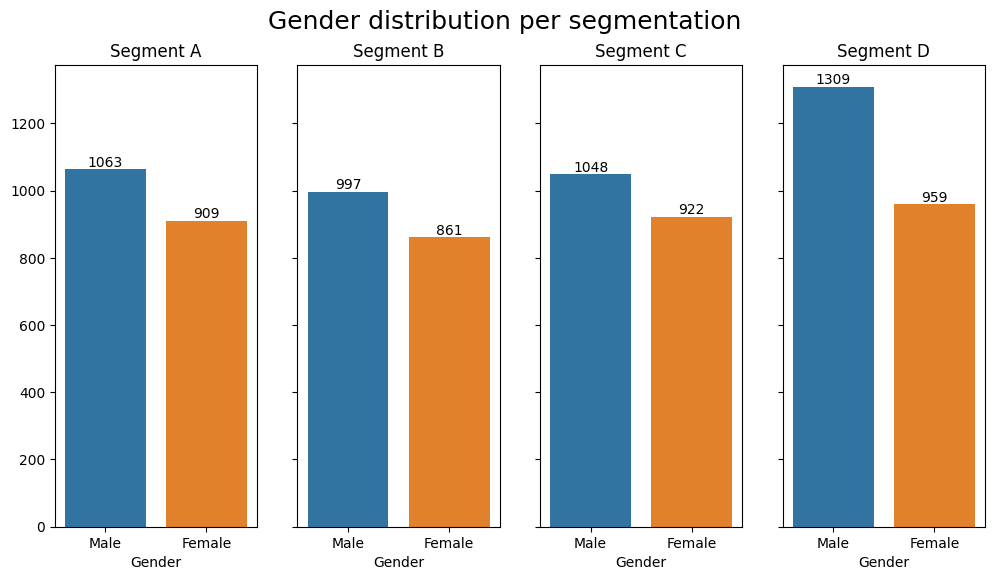

In [16]:
#Choosing the variable for plotting
var_plot = 'Gender'

#Gender by segment
fig, axes = plt.subplots(1,4, figsize = (12,6), sharey = True)
plt.text(x=0.5, y=0.94, s= var_plot + " distribution per segmentation", fontsize=18, ha="center", transform=fig.transFigure)

#Segmentation A
#sns.barplot(ax=axes[0], x=seg_a.Gender, y=seg_a.Gender.value_counts())
ax = sns.countplot(ax=axes[0], x=seg_a[var_plot], order = ['Male', 'Female'])
ax.set_ylabel(None)
axes[0].set_title('Segment A')
#axes[0].bar_label(container=ax.containers[0])
abs_values = seg_a[var_plot].value_counts()[['Male', 'Female']].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation B
ax = sns.countplot(ax=axes[1], x=seg_b[var_plot], order = ['Male', 'Female'])
ax.set_ylabel(None)
axes[1].set_title('Segment B')
abs_values = seg_b[var_plot].value_counts()[['Male', 'Female']].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation C
ax = sns.countplot(ax=axes[2], x=seg_c[var_plot], order = ['Male', 'Female'])
ax.set_ylabel(None)
axes[2].set_title('Segment C')
abs_values = seg_c[var_plot].value_counts()[['Male', 'Female']].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation D
ax = sns.countplot(ax=axes[3], x=seg_d[var_plot], order = ['Male', 'Female'])
ax.set_ylabel(None)
axes[3].set_title('Segment D')
abs_values = seg_d[var_plot].value_counts()[['Male', 'Female']].values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

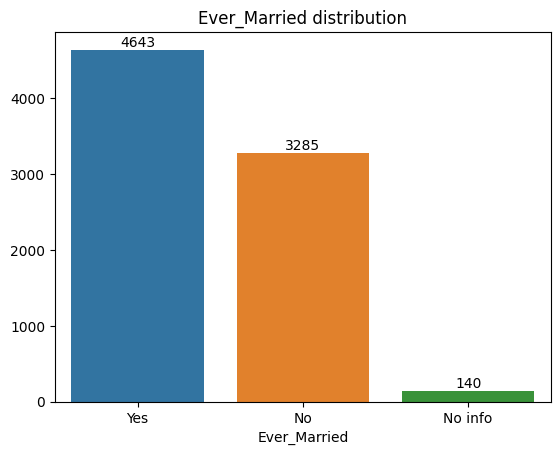

In [17]:
#Ever married distribution in the complete dataset

visual_column = 'Ever_Married'
var_plot = visuals[visual_column]
ax = sns.countplot(x=var_plot,
                   order=var_plot.value_counts(ascending=False).index);
ax.set_ylabel(None)
#plt.text(x=0, y=0, s="Gender distribution", va='top', fontsize=16, weight='bold')
ax.set_title(visual_column + ' distribution')
abs_values = var_plot.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

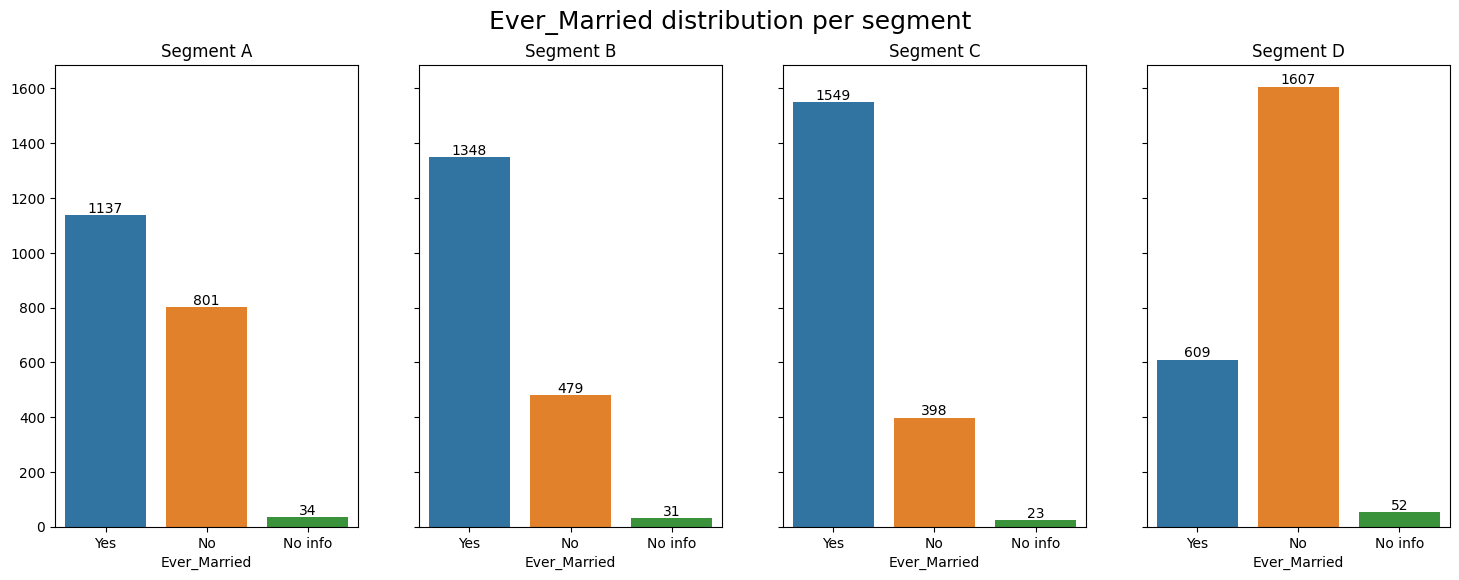

In [18]:
#Choosing the variable for plotting
var_plot = 'Ever_Married'

#Ever married distribution by segment
fig, axes = plt.subplots(1,4, figsize = (18,6), sharey = True)
plt.text(x=0.5, y=0.94, s=var_plot +" distribution per segment", fontsize=18, ha="center", transform=fig.transFigure)

#Segmentation A
ax = sns.countplot(ax=axes[0], x=seg_a[var_plot], order = ['Yes', 'No', 'No info'])
ax.set_ylabel(None)
axes[0].set_title('Segment A')
abs_values = seg_a[var_plot].value_counts()[['Yes','No','No info']].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation B
ax = sns.countplot(ax=axes[1], x=seg_b[var_plot], order = ['Yes', 'No', 'No info'])
ax.set_ylabel(None)
axes[1].set_title('Segment B')
abs_values = seg_b[var_plot].value_counts()[['Yes','No','No info']].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation C
ax = sns.countplot(ax=axes[2], x=seg_c[var_plot], order = ['Yes', 'No', 'No info'])
ax.set_ylabel(None)
axes[2].set_title('Segment C')
abs_values = seg_c[var_plot].value_counts()[['Yes','No','No info']].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation D
ax = sns.countplot(ax=axes[3], x=seg_d[var_plot], order = ['Yes', 'No', 'No info'])
ax.set_ylabel(None)
axes[3].set_title('Segment D')
abs_values = seg_d[var_plot].value_counts()[['Yes','No','No info']].values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

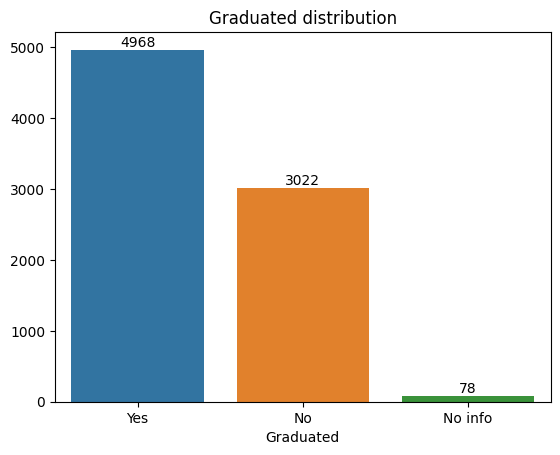

In [19]:
#Graduated distribution in the complete dataset

#Choosing the variable for plotting
visual_column = 'Graduated'
var_plot = visuals[visual_column]

ax = sns.countplot(x=var_plot,
                   order=var_plot.value_counts(ascending=False).index);
ax.set_ylabel(None)
#plt.text(x=0, y=0, s="Gender distribution", va='top', fontsize=16, weight='bold')
ax.set_title(visual_column + ' distribution')
abs_values = var_plot.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

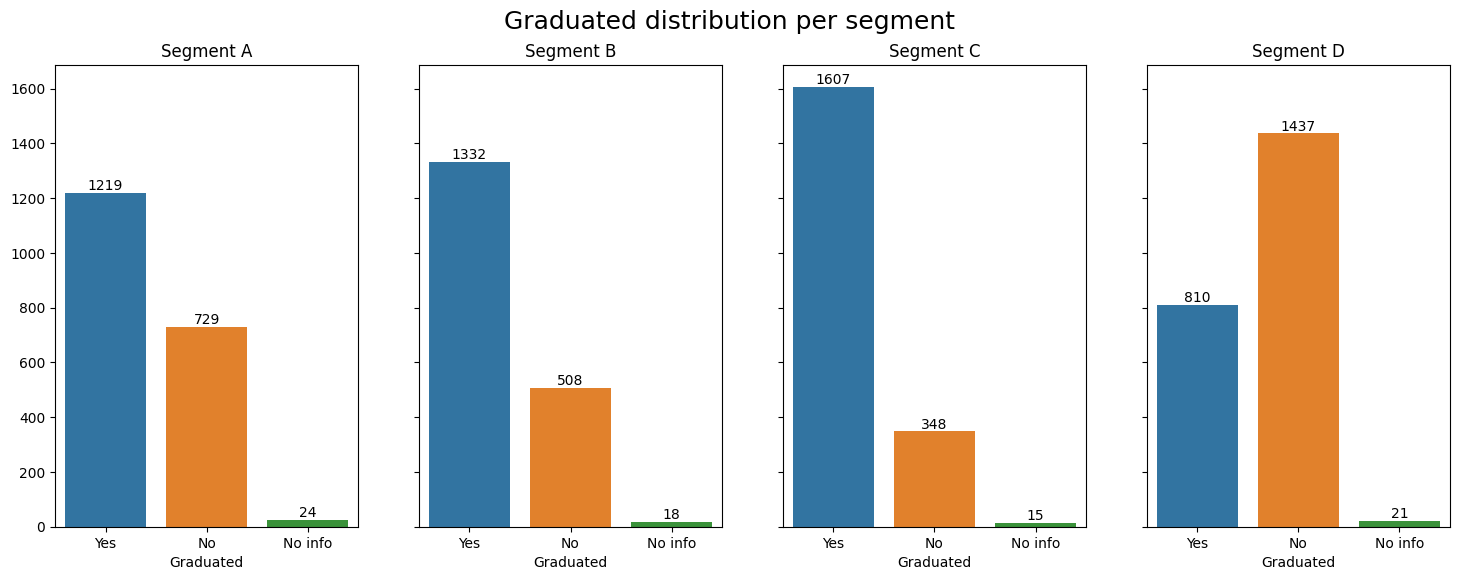

In [20]:
#Choosing the variable for plotting
var_plot = 'Graduated'

#Ever married distribution by segment
fig, axes = plt.subplots(1,4, figsize = (18,6), sharey = True)
plt.text(x=0.5, y=0.94, s=var_plot +" distribution per segment", fontsize=18, ha="center", transform=fig.transFigure)

#Segmentation A
ax = sns.countplot(ax=axes[0], x=seg_a[var_plot], order = ['Yes', 'No', 'No info'])
ax.set_ylabel(None)
axes[0].set_title('Segment A')
abs_values = seg_a[var_plot].value_counts()[['Yes','No','No info']].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation B
ax = sns.countplot(ax=axes[1], x=seg_b[var_plot], order = ['Yes', 'No', 'No info'])
ax.set_ylabel(None)
axes[1].set_title('Segment B')
abs_values = seg_b[var_plot].value_counts()[['Yes','No','No info']].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation C
ax = sns.countplot(ax=axes[2], x=seg_c[var_plot], order = ['Yes', 'No', 'No info'])
ax.set_ylabel(None)
axes[2].set_title('Segment C')
abs_values = seg_c[var_plot].value_counts()[['Yes','No','No info']].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation D
ax = sns.countplot(ax=axes[3], x=seg_d[var_plot], order = ['Yes', 'No', 'No info'])
ax.set_ylabel(None)
axes[3].set_title('Segment D')
abs_values = seg_d[var_plot].value_counts()[['Yes','No','No info']].values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

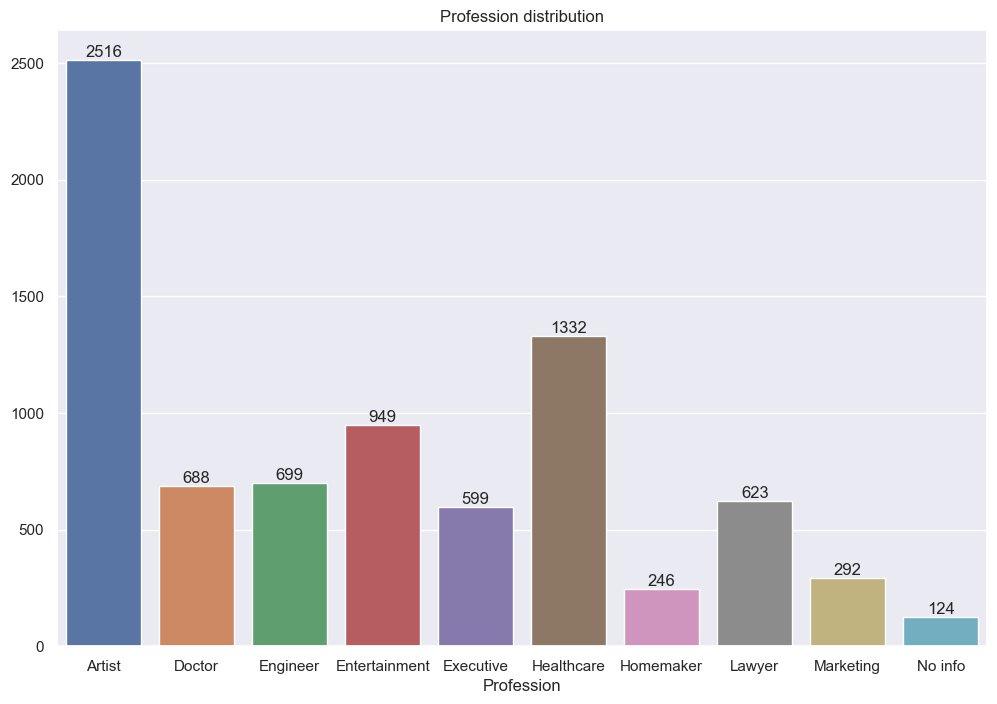

In [21]:
#Graduated distribution in the complete dataset

#Choosing the variable for plotting
visual_column = 'Profession'
var_plot = visuals[visual_column]

#Extracting unique values from column for sorting graphs x-axis
unique_values = sorted(var_plot.unique())

sns.set(rc={'figure.figsize':(12,8)})
ax = sns.countplot(x=var_plot,
                   order=var_plot.value_counts()[unique_values].index);
ax.set_ylabel(None)
#plt.text(x=0, y=0, s="Gender distribution", va='top', fontsize=16, weight='bold')
ax.set_title(visual_column + ' distribution')
abs_values = var_plot.value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

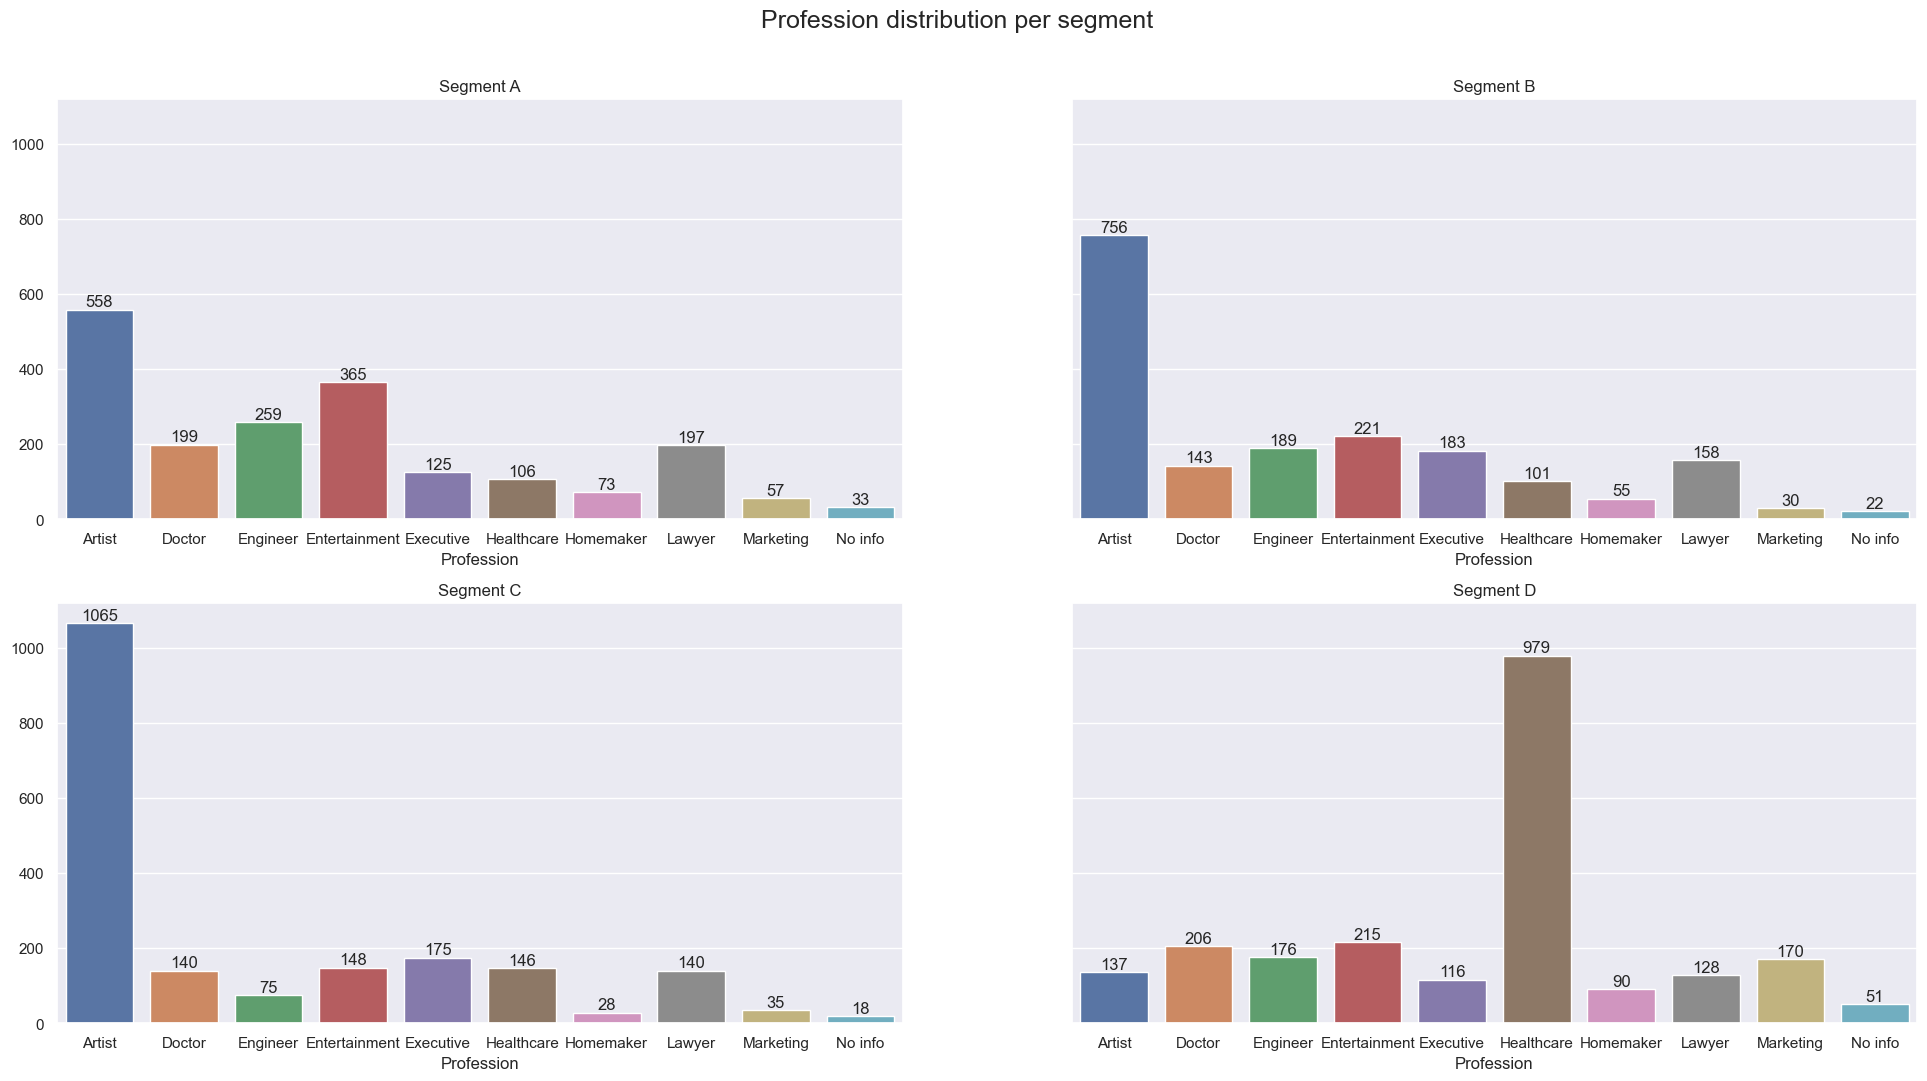

In [22]:
#Choosing the variable for plotting
var_plot = 'Profession'

#Extracting unique values from column for sorting graphs x-axis
unique_values = sorted(visuals[var_plot].unique())

#Profession distribution by segment
fig, axes = plt.subplots(2,2, figsize = (24,12), sharey = True)
plt.text(x=0.5, y=0.94, s=var_plot +" distribution per segment", fontsize=18, ha="center", transform=fig.transFigure)

#Segmentation A
ax = sns.countplot(ax=axes[0,0], x=seg_a[var_plot], order=unique_values)
ax.set_ylabel(None)
axes[0,0].set_title('Segment A')
abs_values = seg_a[var_plot].value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation B
ax = sns.countplot(ax=axes[0,1], x=seg_b[var_plot], order=unique_values)
ax.set_ylabel(None)
axes[0,1].set_title('Segment B')
abs_values = seg_b[var_plot].value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation C
ax = sns.countplot(ax=axes[1,0], x=seg_c[var_plot], order=unique_values)
ax.set_ylabel(None)
axes[1,0].set_title('Segment C')
abs_values = seg_c[var_plot].value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation D
ax = sns.countplot(ax=axes[1,1], x=seg_d[var_plot], order=unique_values)
ax.set_ylabel(None)
axes[1,1].set_title('Segment D')
abs_values = seg_d[var_plot].value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

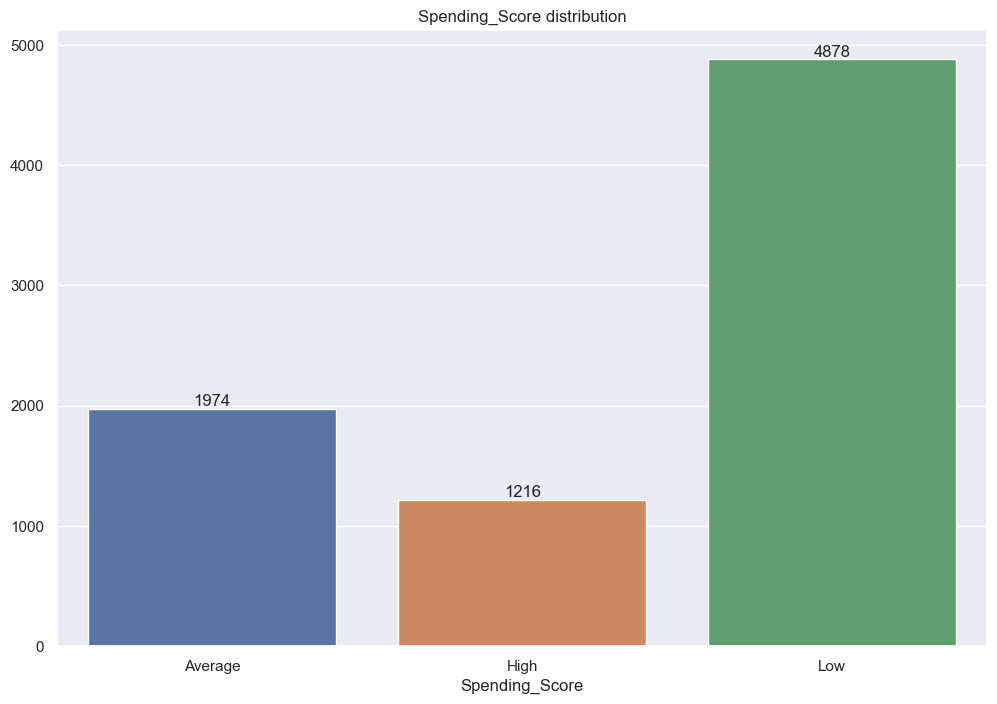

In [23]:
#Graduated distribution in the complete dataset

#Choosing the variable for plotting
visual_column = 'Spending_Score'
var_plot = visuals[visual_column]

#Extracting unique values from column for sorting graphs x-axis
unique_values = sorted(var_plot.unique())

sns.set(rc={'figure.figsize':(12,8)})
ax = sns.countplot(x=var_plot,
                   order=var_plot.value_counts()[unique_values].index);
ax.set_ylabel(None)
#plt.text(x=0, y=0, s="Gender distribution", va='top', fontsize=16, weight='bold')
ax.set_title(visual_column + ' distribution')
abs_values = var_plot.value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

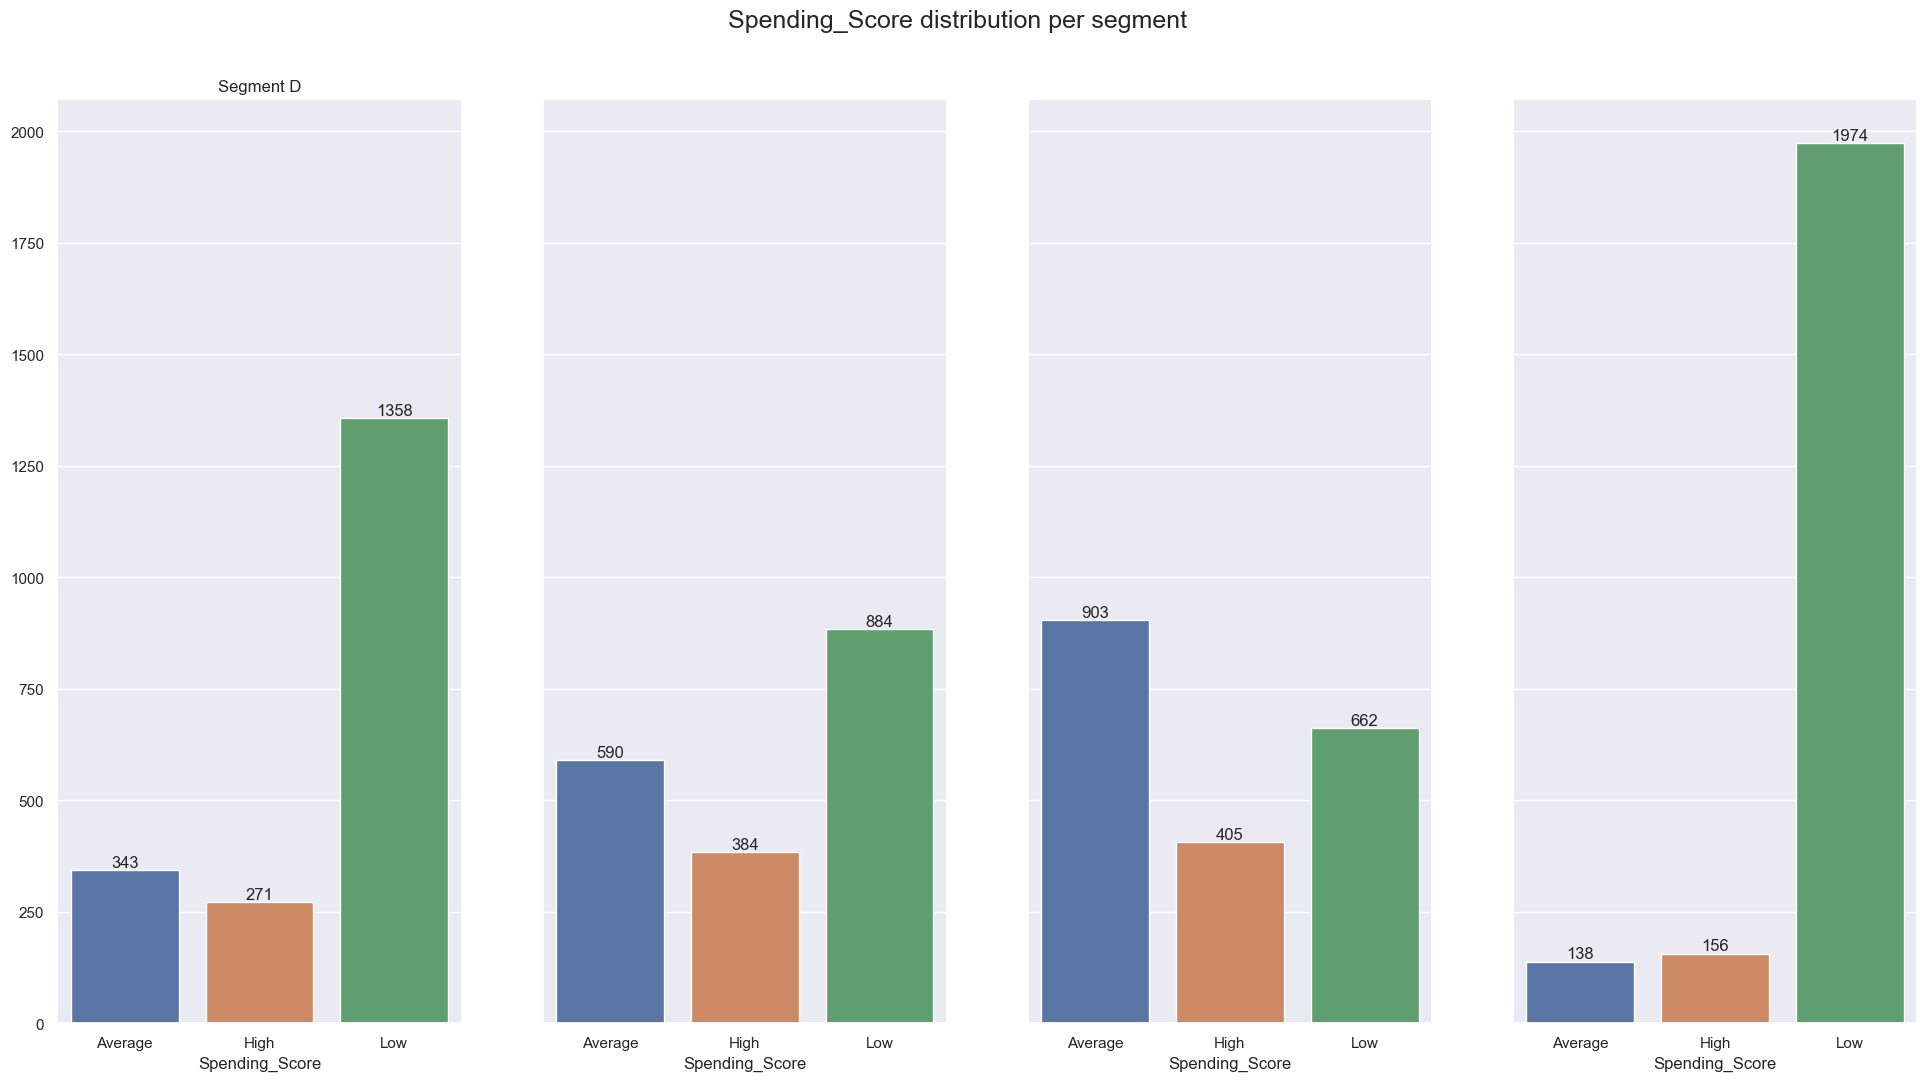

In [24]:
#Choosing the variable for plotting
var_plot = 'Spending_Score'

#Extracting unique values from column for sorting graphs x-axis
unique_values = sorted(visuals[var_plot].unique())

#Spending score distribution by segment
fig, axes = plt.subplots(1,4, figsize = (24,12), sharey = True)
plt.text(x=0.5, y=0.94, s=var_plot +" distribution per segment", fontsize=18, ha="center", transform=fig.transFigure)

#Segmentation A
ax = sns.countplot(ax=axes[0], x=seg_a[var_plot], order=unique_values)
ax.set_ylabel(None)
axes[0].set_title('Segment A')
abs_values = seg_a[var_plot].value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation B
ax = sns.countplot(ax=axes[1], x=seg_b[var_plot], order=unique_values)
ax.set_ylabel(None)
axes[0].set_title('Segment B')
abs_values = seg_b[var_plot].value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation C
ax = sns.countplot(ax=axes[2], x=seg_c[var_plot], order=unique_values)
ax.set_ylabel(None)
axes[0].set_title('Segment C')
abs_values = seg_c[var_plot].value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation D
ax = sns.countplot(ax=axes[3], x=seg_d[var_plot], order=unique_values)
ax.set_ylabel(None)
axes[0].set_title('Segment D')
abs_values = seg_d[var_plot].value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

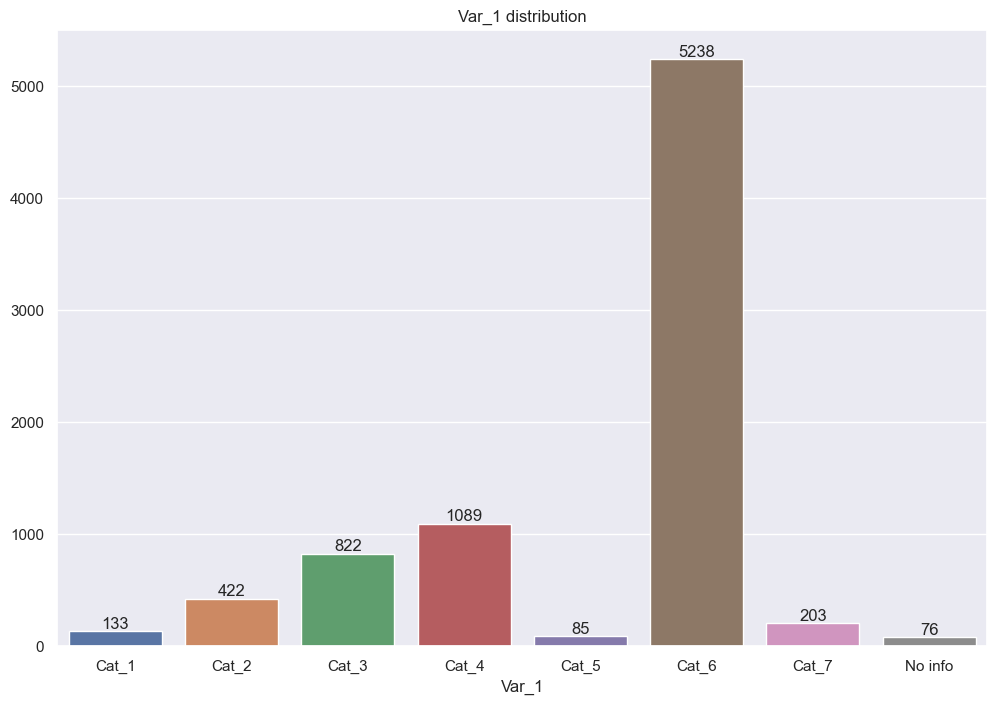

In [25]:
#Var_1 distribution in the complete dataset

#Choosing the variable for plotting
visual_column = 'Var_1'
var_plot = visuals[visual_column]

#Extracting unique values from column for sorting graphs x-axis
unique_values = sorted(var_plot.unique())

sns.set(rc={'figure.figsize':(12,8)})
ax = sns.countplot(x=var_plot,
                   order=var_plot.value_counts()[unique_values].index);
ax.set_ylabel(None)
#plt.text(x=0, y=0, s="Gender distribution", va='top', fontsize=16, weight='bold')
ax.set_title(visual_column + ' distribution')
abs_values = var_plot.value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

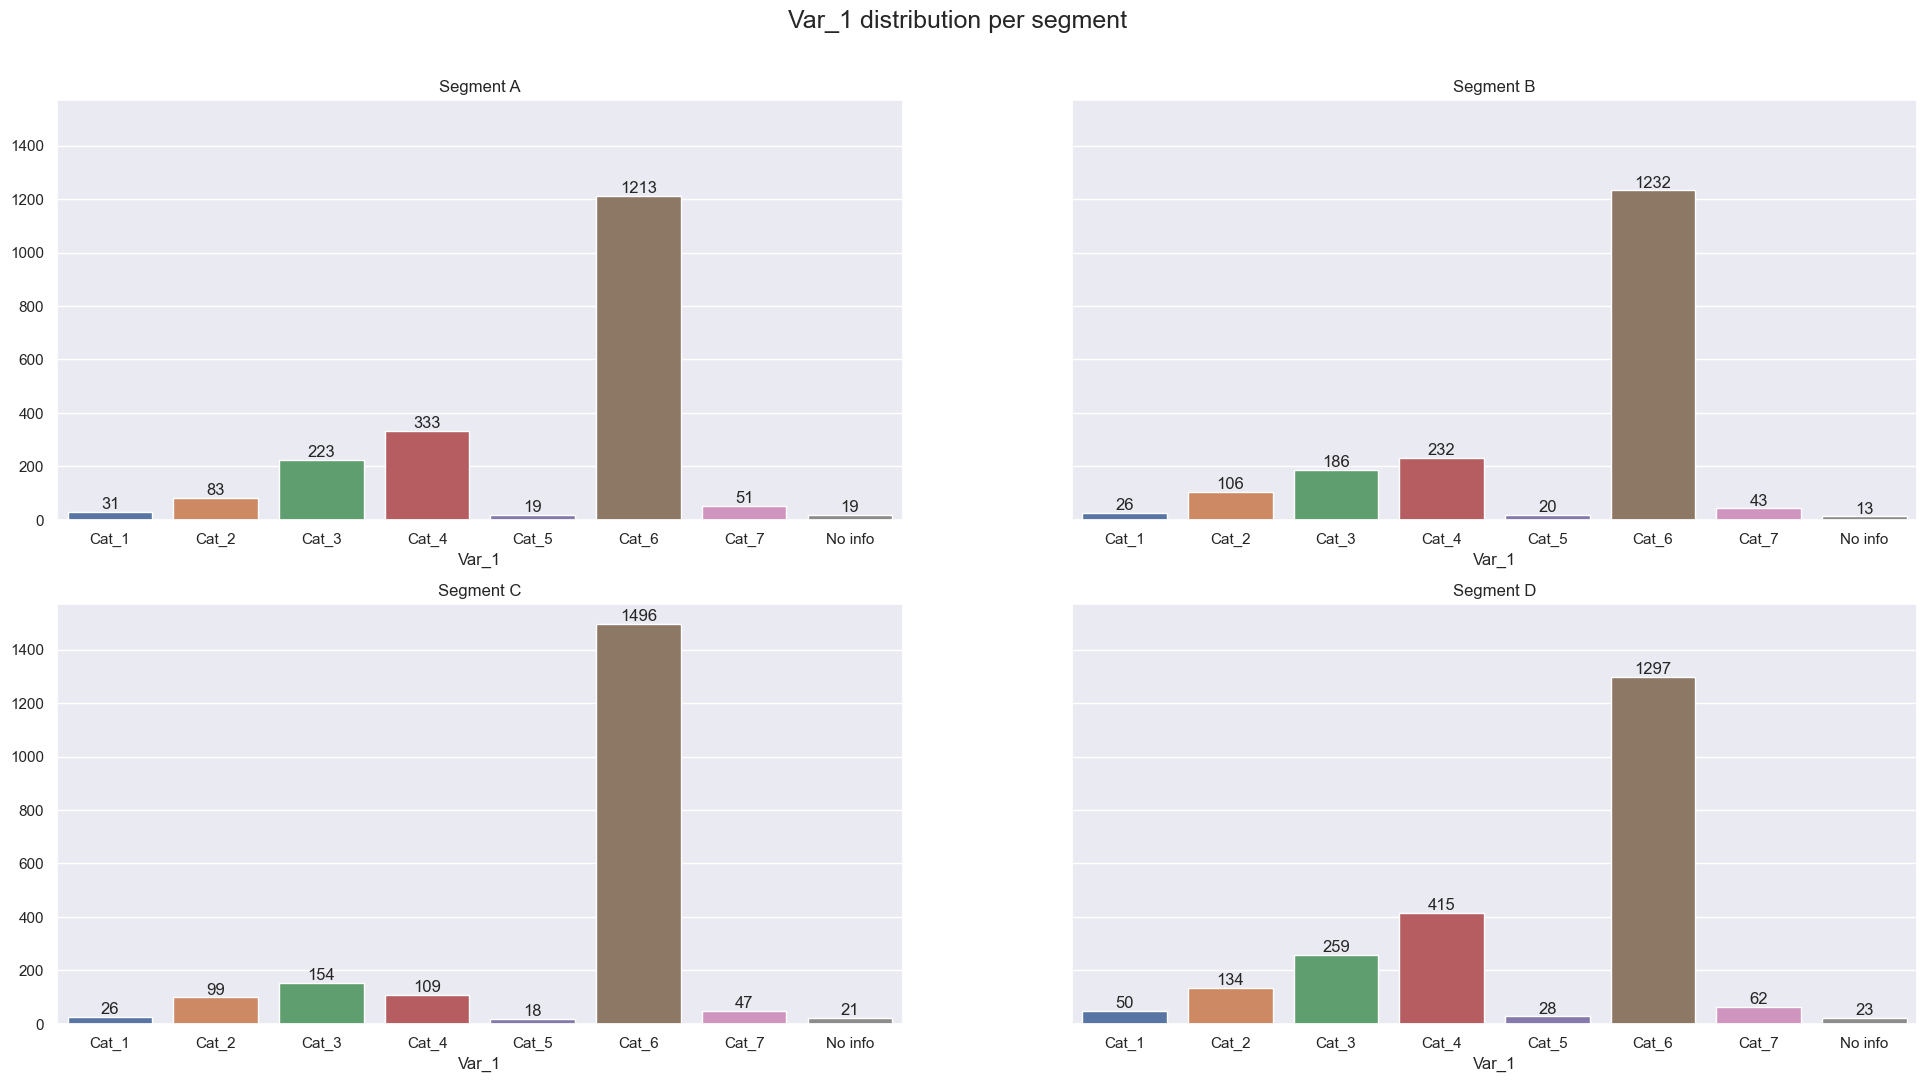

In [26]:
#Choosing the variable for plotting
var_plot = 'Var_1'

#Extracting unique values from column for sorting graphs x-axis
unique_values = sorted(visuals[var_plot].unique())

#Var_1 distribution by segment
fig, axes = plt.subplots(2,2, figsize = (24,12), sharey = True)
plt.text(x=0.5, y=0.94, s=var_plot +" distribution per segment", fontsize=18, ha="center", transform=fig.transFigure)

#Segmentation A
ax = sns.countplot(ax=axes[0,0], x=seg_a[var_plot], order=unique_values)
ax.set_ylabel(None)
axes[0,0].set_title('Segment A')
abs_values = seg_a[var_plot].value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation B
ax = sns.countplot(ax=axes[0,1], x=seg_b[var_plot], order=unique_values)
ax.set_ylabel(None)
axes[0,1].set_title('Segment B')
abs_values = seg_b[var_plot].value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation C
ax = sns.countplot(ax=axes[1,0], x=seg_c[var_plot], order=unique_values)
ax.set_ylabel(None)
axes[1,0].set_title('Segment C')
abs_values = seg_c[var_plot].value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#Segmentation D
ax = sns.countplot(ax=axes[1,1], x=seg_d[var_plot], order=unique_values)
ax.set_ylabel(None)
axes[1,1].set_title('Segment D')
abs_values = seg_d[var_plot].value_counts()[unique_values].values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

##### Visualization - Numerical variables

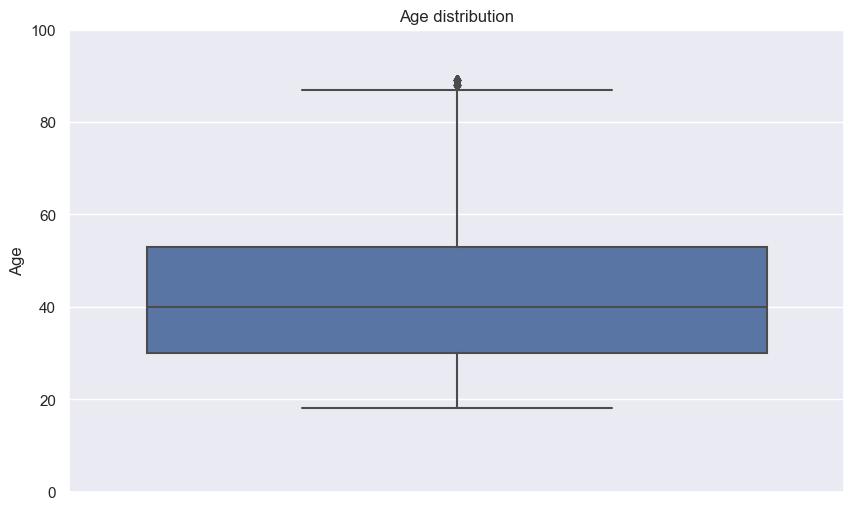

In [27]:
#Plotting graph: Age distribution in the complete dataset

#Choosing the variable for plotting
visual_column = 'Age'

#Plotting graph
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.boxplot(data = visuals, y = visual_column, order = ['A','B','C','D'])
ax.set(ylim=(0, 100))
ax.set_title(visual_column + ' distribution')
plt.show()

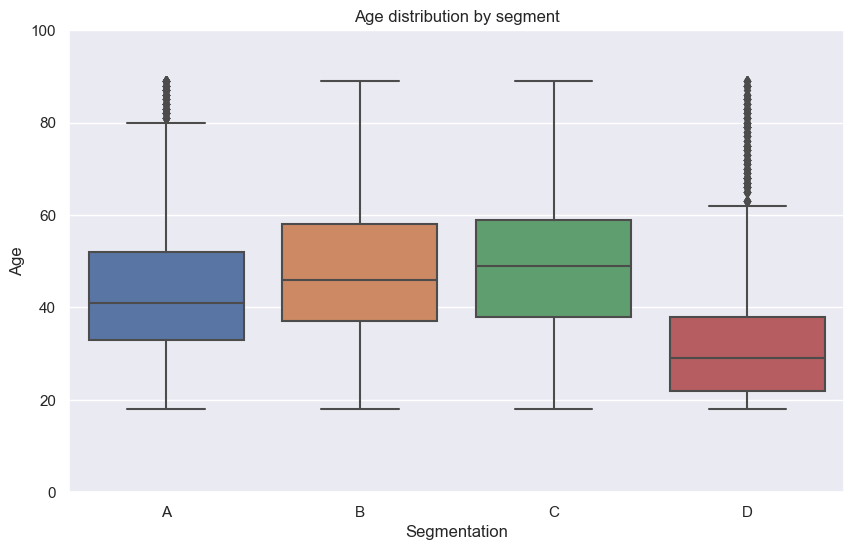

In [28]:
#Plotting graph: Age distribution by segment

ax = sns.boxplot(data = visuals, y = visual_column, x = 'Segmentation', order = ['A','B','C','D'])
ax.set(ylim=(0, 100))
ax.set_title(visual_column + ' distribution by segment')
plt.show()

In [29]:
#Data preparation: Cleaning non-numerical values from column Work_Experience

#Choosing the variable for plotting
visual_column = 'Work_Experience'

#Removing missing values from dataset
visuals_filtered = visuals[visuals[visual_column] != "No info"]
visuals_filtered[visual_column] = visuals_filtered[visual_column].astype(float)

C:\Users\lidia\AppData\Local\Temp\ipykernel_73420\4227119885.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visuals_filtered[visual_column] = visuals_filtered[visual_column].astype(float)


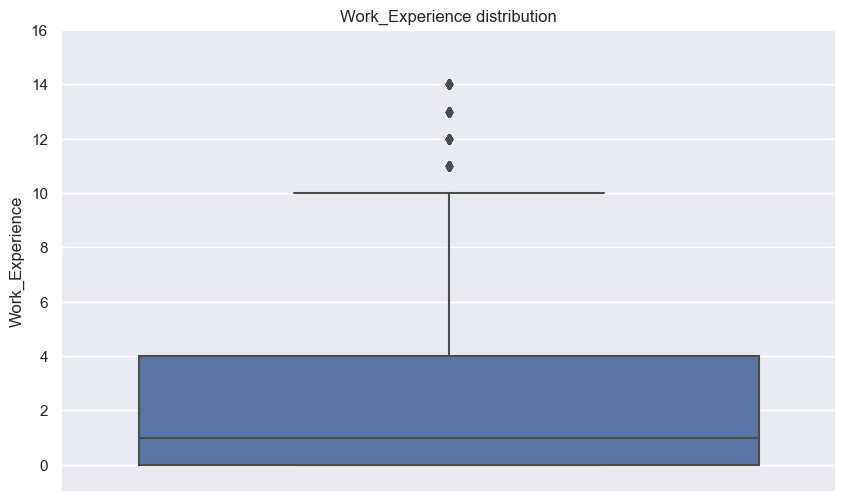

In [30]:
#Plotting graph: Work experience ditribution in the complete dataset
ax = sns.boxplot(data = visuals_filtered, y = visual_column, order = ['A','B','C','D'])
ax.set(ylim=(-1, 16))
ax.set_title(visual_column + ' distribution')
plt.show()

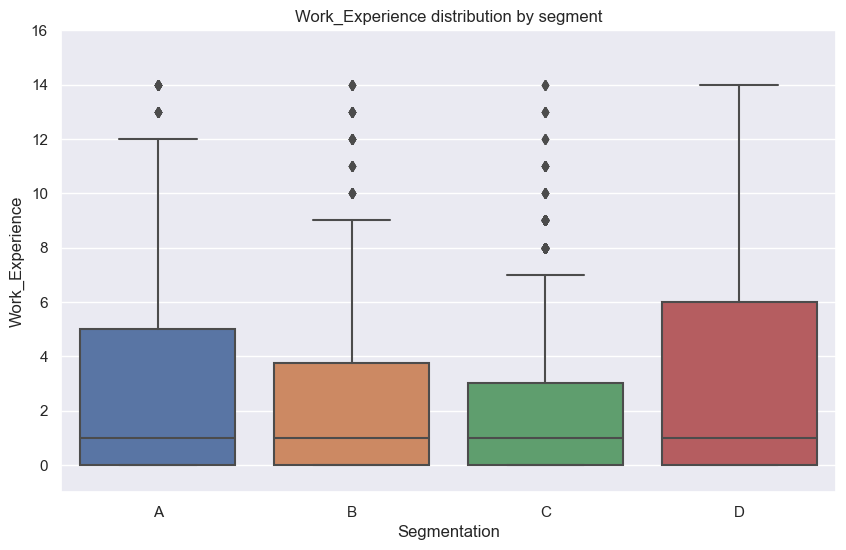

In [31]:
#Plotting graph: Work experience ditribution by segment
ax = sns.boxplot(data = visuals_filtered, y = visual_column, x = 'Segmentation', order = ['A','B','C','D'])
ax.set(ylim=(-1, 16))
ax.set_title(visual_column + ' distribution by segment')
plt.show()

In [32]:
#Data preparation: Cleaning non-numerical values from column Family_size

#Choosing the variable for plotting
visual_column = 'Family_Size'

#Removing missing values from dataset
visuals_filtered = visuals[visuals[visual_column] != "No info"]
visuals_filtered[visual_column] = visuals_filtered[visual_column].astype(float)

C:\Users\lidia\AppData\Local\Temp\ipykernel_73420\2892141169.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visuals_filtered[visual_column] = visuals_filtered[visual_column].astype(float)


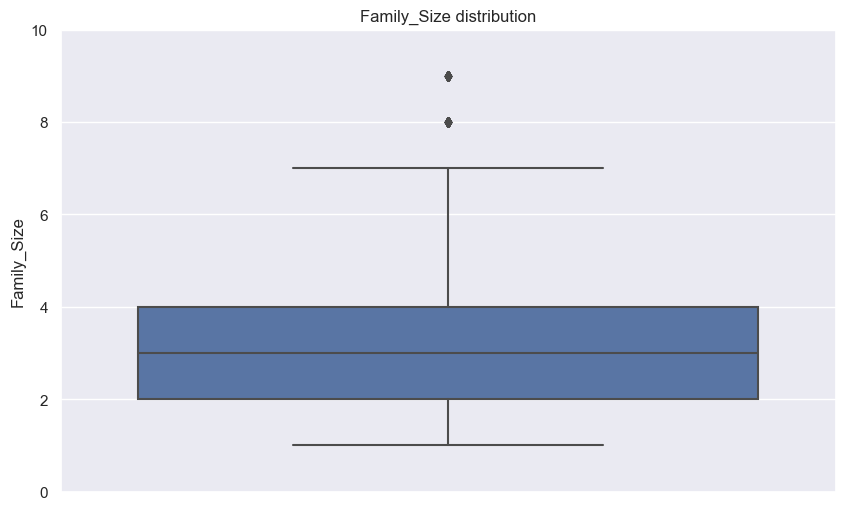

In [33]:
#Plotting graph: Family size ditribution in the complete dataset
ax = sns.boxplot(data = visuals_filtered, y = visual_column, order = ['A','B','C','D'])
ax.set(ylim=(0, 10))
ax.set_title(visual_column + ' distribution')
plt.show()

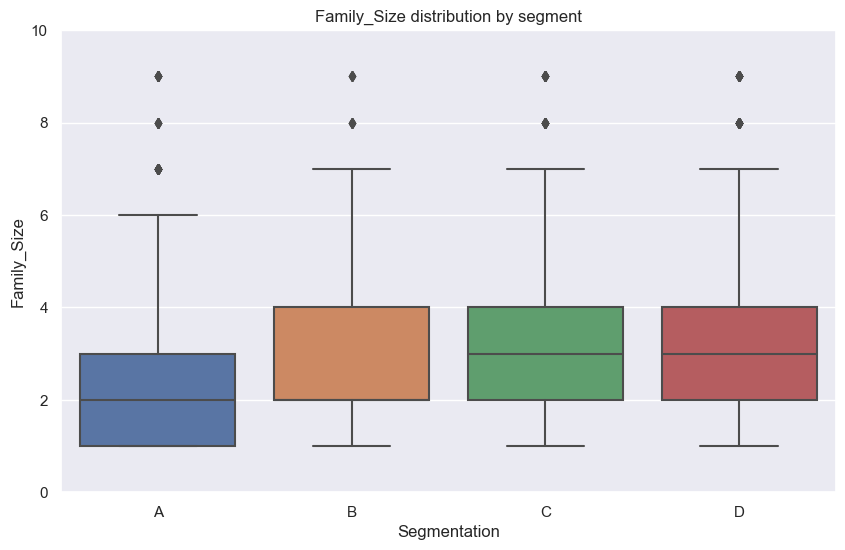

In [34]:
#Plotting graph: Family_Size ditribution by segment
ax = sns.boxplot(data = visuals_filtered, y = visual_column, x = 'Segmentation', order = ['A','B','C','D'])
ax.set(ylim=(0, 10))
ax.set_title(visual_column + ' distribution by segment')
plt.show()

### Data modeling: K-Nearest Neighbour (KNN)

#### Data preparation

In [35]:
#Duplicating raw dataframe for data preparation
df_model = df_raw[:]

In [36]:
#Replacing Segmentation for numerical values
df_model['Segmentation'] = df_model['Segmentation'].map({'A':0, 'B':1, 'C':2, 'D':3}).astype(int)
df_model.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,3
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,1
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,0


In [37]:
#Replacing spending score and gender for numerical values
df_model['Spending_Score'] = df_model['Spending_Score'].map({'Low':0, 'Average':1, 'High':2}).astype(int)
df_model['Gender'] = df_model['Gender'].map({'Male':1, 'Female':0}).astype(int)
df_model.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,No,22,No,Healthcare,1.0,0,4.0,Cat_4,3
1,462643,0,Yes,38,Yes,Engineer,NaN,1,3.0,Cat_4,0
2,466315,0,Yes,67,Yes,Engineer,1.0,0,1.0,Cat_6,1
3,461735,1,Yes,67,Yes,Lawyer,0.0,2,2.0,Cat_6,1
4,462669,0,Yes,40,Yes,Entertainment,NaN,2,6.0,Cat_6,0


In [38]:
#Filling missing values in categorical variables columns
df_model['Ever_Married'] = df_model['Ever_Married'].fillna('No info')
df_model['Profession'] = df_model['Profession'].fillna('No info')
df_model['Graduated'] = df_model['Graduated'].fillna('No info')
df_model['Var_1'] = df_model['Var_1'].fillna('No info')

In [40]:
df_model.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,No,22,No,Healthcare,1.0,0,4.0,Cat_4,3
1,462643,0,Yes,38,Yes,Engineer,NaN,1,3.0,Cat_4,0
2,466315,0,Yes,67,Yes,Engineer,1.0,0,1.0,Cat_6,1
3,461735,1,Yes,67,Yes,Lawyer,0.0,2,2.0,Cat_6,1
4,462669,0,Yes,40,Yes,Entertainment,NaN,2,6.0,Cat_6,0


In [41]:
#Creating dummy columns for categorical variables
dummy = ['Ever_Married', 'Profession', 'Graduated', 'Var_1']
just_dummies = pd.get_dummies(df_model[dummy])

In [42]:
#Adding dummy columns in the dataset
df_model = pd.concat([df_model, just_dummies], axis=1)
df_model.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Graduated_No info,Graduated_Yes,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Var_1_No info
0,462809,1,No,22,No,Healthcare,1.0,0,4.0,Cat_4,...,0,0,0,0,0,1,0,0,0,0
1,462643,0,Yes,38,Yes,Engineer,NaN,1,3.0,Cat_4,...,0,1,0,0,0,1,0,0,0,0
2,466315,0,Yes,67,Yes,Engineer,1.0,0,1.0,Cat_6,...,0,1,0,0,0,0,0,1,0,0
3,461735,1,Yes,67,Yes,Lawyer,0.0,2,2.0,Cat_6,...,0,1,0,0,0,0,0,1,0,0
4,462669,0,Yes,40,Yes,Entertainment,NaN,2,6.0,Cat_6,...,0,1,0,0,0,0,0,1,0,0


In [43]:
#Dropping a dummy column for each categorical variable
drop_dummy = ['Ever_Married_No info','Profession_No info','Graduated_No info','Var_1_No info']
df_model = df_model.drop(drop_dummy, axis = 1)
df_model.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Profession_Marketing,Graduated_No,Graduated_Yes,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,1,No,22,No,Healthcare,1.0,0,4.0,Cat_4,...,0,1,0,0,0,0,1,0,0,0
1,462643,0,Yes,38,Yes,Engineer,NaN,1,3.0,Cat_4,...,0,0,1,0,0,0,1,0,0,0
2,466315,0,Yes,67,Yes,Engineer,1.0,0,1.0,Cat_6,...,0,0,1,0,0,0,0,0,1,0
3,461735,1,Yes,67,Yes,Lawyer,0.0,2,2.0,Cat_6,...,0,0,1,0,0,0,0,0,1,0
4,462669,0,Yes,40,Yes,Entertainment,NaN,2,6.0,Cat_6,...,0,0,1,0,0,0,0,0,1,0


In [44]:
#Filling missing data on numerical variables
df_model['Work_Experience'] = df_model['Work_Experience'].fillna(df_model['Work_Experience'].median())
df_model['Family_Size'] = df_model['Family_Size'].fillna(df_model['Family_Size'].median())
df_model.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Profession_Marketing,Graduated_No,Graduated_Yes,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,1,No,22,No,Healthcare,1.0,0,4.0,Cat_4,...,0,1,0,0,0,0,1,0,0,0
1,462643,0,Yes,38,Yes,Engineer,1.0,1,3.0,Cat_4,...,0,0,1,0,0,0,1,0,0,0
2,466315,0,Yes,67,Yes,Engineer,1.0,0,1.0,Cat_6,...,0,0,1,0,0,0,0,0,1,0
3,461735,1,Yes,67,Yes,Lawyer,0.0,2,2.0,Cat_6,...,0,0,1,0,0,0,0,0,1,0
4,462669,0,Yes,40,Yes,Entertainment,1.0,2,6.0,Cat_6,...,0,0,1,0,0,0,0,0,1,0


In [45]:
#Checking for missing values and data types
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8068 non-null   int64  
 1   Gender                    8068 non-null   int32  
 2   Ever_Married              8068 non-null   object 
 3   Age                       8068 non-null   int64  
 4   Graduated                 8068 non-null   object 
 5   Profession                8068 non-null   object 
 6   Work_Experience           8068 non-null   float64
 7   Spending_Score            8068 non-null   int32  
 8   Family_Size               8068 non-null   float64
 9   Var_1                     8068 non-null   object 
 10  Segmentation              8068 non-null   int32  
 11  Ever_Married_No           8068 non-null   uint8  
 12  Ever_Married_Yes          8068 non-null   uint8  
 13  Profession_Artist         8068 non-null   uint8  
 14  Professi

In [46]:
#Dropping original columns of categorical variables
drop_non_numeric = ['ID', 'Ever_Married','Graduated','Profession','Var_1']
df_model_numerics = df_model.drop(drop_non_numeric, axis = 1)
df_model_numerics.head()

,Gender,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Ever_Married_No,Ever_Married_Yes,Profession_Artist,Profession_Doctor,...,Profession_Marketing,Graduated_No,Graduated_Yes,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,22,1.0,0,4.0,3,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,38,1.0,1,3.0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,67,1.0,0,1.0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,67,0.0,2,2.0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,40,1.0,2,6.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [47]:
#Separating column 'Segmentation' from the dataset
x_df_model_numerics = df_model_numerics.drop(df_model_numerics[['Segmentation']],axis=1)
y_df_model_numerics = df_model_numerics['Segmentation']

In [48]:
#Scaling variables (minmax method)
scale = MinMaxScaler()
x_df_model_numerics = pd.DataFrame(scale.fit_transform(x_df_model_numerics), columns = x_df_model_numerics.columns)
x_df_model_numerics.head()

,Gender,Age,Work_Experience,Spending_Score,Family_Size,Ever_Married_No,Ever_Married_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Marketing,Graduated_No,Graduated_Yes,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1.0,0.056338,0.071429,0.0,0.375,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.281690,0.071429,0.5,0.250,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.690141,0.071429,0.0,0.000,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.690141,0.000000,1.0,0.125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.309859,0.071429,1.0,0.625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Modeling

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x_df_model_numerics, y_df_model_numerics, test_size=0.2, random_state = 1)
knn_clf = KNeighborsClassifier(n_neighbors=21)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

### Evaluating

In [50]:
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:')
print (result1)
result2 = accuracy_score(y_test,ypred)
#print(f1_score(y_test,ypred))
print('Accuracy:', result2)

Confusion Matrix:
[[169 103  44  74]
 [107 119  98  39]
 [ 41  77 232  56]
 [100  45  15 295]]
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.43      0.42       390
           1       0.35      0.33      0.34       363
           2       0.60      0.57      0.58       406
           3       0.64      0.65      0.64       455

    accuracy                           0.50      1614
   macro avg       0.50      0.50      0.50      1614
weighted avg       0.50      0.50      0.50      1614

Accuracy: 0.5049566294919455
